In [ ]:
!pip install tensorflow-gpu

In [ ]:
pip install chart_studio

In [ ]:
!nvidia-smi

<font size="+3" color=purple ><b> <center><u>Predicting Red Wine Quality Using Neural Nets</u></center></b></font>

# Objective

The aim of this kernel is provide all essential Knowledege to a beginners on **How to build their first Artificial Neural Nets using Tensorflow and Keras?**.In this kernel I am using **Red Wine Quality Dataset** to predict the quality of the wine.

This kernel is the first part of the Neural Network,on further moving I am going to discuss about various Architecture of the Neural Networks used in Computer Vision and NLP.

PART 1 - <font color="blue">You are on it</font><br>
PART 2 - <font color="orange">Convolutional Neural Network - Comming Soon!!</font><br>

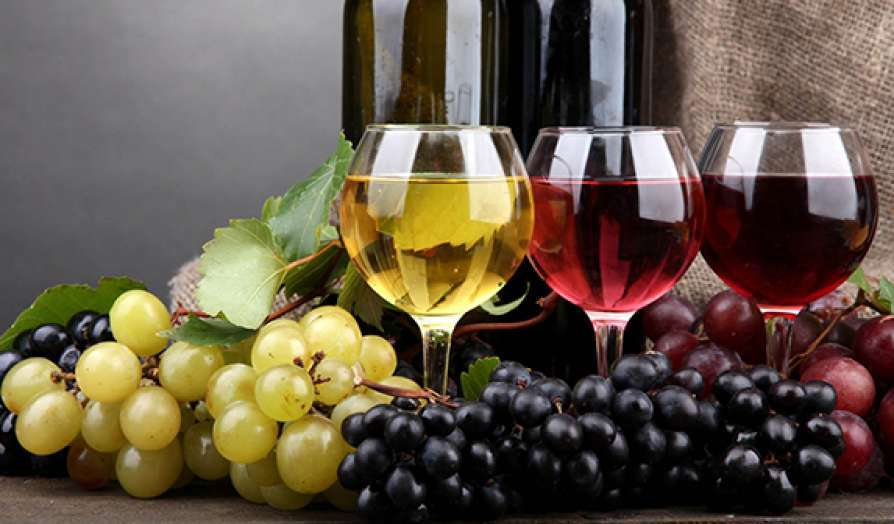

## About the Dataset

### **Red Wine Quality**

>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

>These datasets can be viewed as **classification or regression tasks**. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

*This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality*

### **What we need to Predict?**

>In this Dataset we need to **predict the quality of the wine based on various features like fixed acidity, volatile acidity, citric acid, residual sugar, density, pH and many more**.

>The quality of the wine has been **graded between 3 to 8 i.e (3,4,5,6,7,8)** as the range increases the quality of the wine increses but we need to do a **Data Segmentation or we need to club them together in a certain range on the basis of bins in Histogram** Plot so I am using a certain intervals and encoding the values which are in the range of (3,6.5] as 0 which is bad quality of wine and (6.5,8] as 1 which is good quality of wine.

**So, lets move further and Import our necessary libraries**
 



## **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.datasets import load_wine


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## **Read Dataset**

**Kaggle Dataset** : [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

In [ ]:
wine = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

## **Exploratory data analysis**

In [ ]:
wine.head()

In [ ]:
wine.isnull().sum

In [ ]:
wine.describe()

In [ ]:
wine.info()

## **Data Visualization**

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

In [ ]:
corr = wine.corr()
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(wine.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(wine.columns)
ax.set_yticklabels(wine.columns)
plt.show()

In [ ]:
plt.figure(figsize = (14,8))
corr = wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
fig = px.imshow(wine)
fig.show()

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(wine,cmap='plasma')

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(wine,bins=30);

### **Segmenting and Encoding the Wine Quality Column Data**

In [ ]:
##Making Quality Data Segmentation we're going to make our data in two categories 0-->bad and 1 --->good in wines

bins = (2,6.5,8)

group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins = bins, labels=group_names)

In [ ]:
## encoding the values as binary on the basis of data segmentation
encode = LabelEncoder()

In [ ]:
wine['quality'] = encode.fit_transform(wine['quality'])

In [ ]:
wine['quality'].value_counts()

### From the above count:

1. Their are 1382 Zero's which depicts the bad wine quality
2. Their are 217 Ones which depicts the good wine quality

>As from the above analysis their are more bad quality wine then good

In [ ]:
sns.countplot(wine['quality'])

In [ ]:
fig = go.Figure(data=[go.Pie(labels=wine['quality'], values=wine['quality'])])
fig.show()

print(wine.quality.value_counts())

In [ ]:
fig = px.pie(wine, values='alcohol', names='pH')
fig.show()

In [ ]:
wine.head()

In [ ]:
wine.quality.unique()

In [ ]:
wine.shape

## Split the Data into Train and Test

In [ ]:
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

In [ ]:
X

In [ ]:
y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

## Feature Scaling

In [ ]:
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
print(f"Values of X_train after Normalization {X_train}")
print("<-------------------------------------------------------------->")
print(f"Values of X_test after Normalization {X_test}")

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
y_train = y_train.to_numpy()

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
y_train

In [ ]:
y_test

## Building a Neural Network Using Keras

<img src="https://media.giphy.com/media/xSi0vyq0FI6Os/giphy.gif">

In [ ]:
my_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(156,activation='relu'),
  tf.keras.layers.Dropout(0.30),
  tf.keras.layers.Dense(116,activation='sigmoid'),
  tf.keras.layers.Dense(200,activation='relu'),
  tf.keras.layers.Dropout(0.40),
  tf.keras.layers.Dense(156,activation='softmax')
])

In [ ]:
optimiser = tf.keras.optimizers.Adam()
my_model.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
X_train.shape

In [ ]:
X_train

In [ ]:
history = my_model.fit(X_train, y_train,validation_split=0.33, epochs=300, batch_size=16)

In [ ]:
my_model.evaluate(X_test, y_test)

In [ ]:
my_predict = my_model.predict(X_test)
my_predict

In [ ]:
np.round(my_predict)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
fig = plt.figure(figsize = (10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## What is Next ⏭ ?

### CNN

<img src="https://media.giphy.com/media/YPyrKWNq2FAGaw8QBv/giphy.gif">

<font size="+2" color=orange ><b> <center><u>I hope you like ❤ this kernel, if yes Upvote!!</u></center></b></font>